In [119]:
import mido 
import pretty_midi as pm

# Extracting midi data from a MIDI file

In [120]:
filename     = 'C:/Users/ELRA7/Documents/Homework Fall (2020)/EAS 503/stage-1-the-jungle-.mid'
contra_track = mido.MidiFile(filename) # opens midi file 

In [121]:
filename     = 'C:/Users/ELRA7/Documents/Homework Fall (2020)/EAS 503/stage-1-the-jungle-.mid'

In [122]:
# headers{status, channel, note number, }

In [123]:
#contra_track.get_pitch_class_histogram()

In [124]:
# iterating over the midi file can extract midi messages
def message_extractor(filename):
    
    midi_track = mido.MidiFile(filename) # opens midi file 
    messages = []
    message = ''
    for msg in midi_track:
        if not msg.is_meta:
            messages.append(str(msg).split())
    return(messages)

def parser(messages):
    for i in range(len(messages)):
        if messages[i][0] == "note_on":
            messages[i][0] = 1
        elif messages[i][0] == "note_off":
            messages[i][0] = 0
    for i in range(len(messages)):
        if messages[i][1].startswith('channel') == True: 
            messages[i][1] = int(messages[i][1].strip('channel='))
    for i in range(len(messages)):
        if messages[i][2].startswith('note') == True: 
            messages[i][2] = int(messages[i][2].strip('note='))
    for i in range(len(messages)):
        if messages[i][3].startswith('velocity') == True: 
            messages[i][3] = int(messages[i][3].strip('velocity='))
    for i in range(len(messages)):
        if len(messages[i]) == 5:
            if messages[i][4].startswith('time') == True:
                messages[i][4] = float(messages[i][4].strip('time='))
                messages[i][4] = round(messages[i][4], 2)
    return(messages)

In [125]:
#messages # display messages

# Parsing Midi Messages and putting it into a data frame. 

In [126]:
messages = message_extractor(filename)

In [127]:
parsed_messages = parser(messages)

In [128]:
import pandas as pd

In [129]:
MIDIData = pd.DataFrame(parsed_messages[10:])
MIDIData.columns = ['note stat', 'channel', "pitch", 'velocity', 'time'] # re names coulumn headers 
#MIDIData

# Analysis and Graphing 

In [130]:
import matplotlib.pyplot as plt

Text(0,0.5,'pitch')

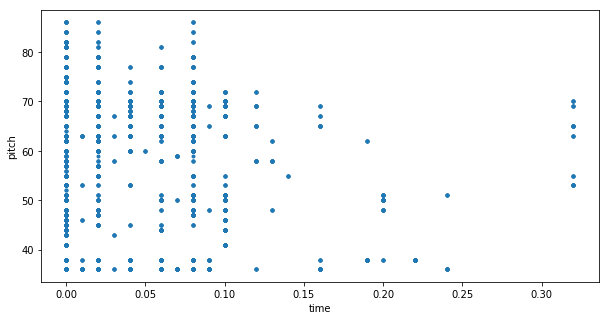

In [131]:
plt.figure(figsize = (10,5))
plt.plot(MIDIData['time'], MIDIData['pitch'],'.')
plt.xlabel("time")
plt.ylabel('pitch')

In [132]:
# using len() on get_downbeats you can count the number of measures

In [133]:
# len(contra_track.get_beats())/4

In [134]:
import seaborn as sns

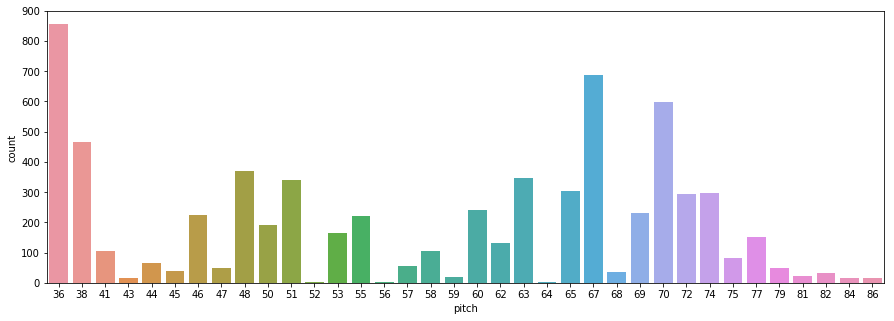

In [135]:
plt.figure(figsize = (15,5))
sns.countplot(MIDIData['pitch'])

# Models and Predictions

# Creating the Midi Track 

In [42]:
#new       = mido.MidiFile()
#new_track = mido.MidiTrack(())
#quadgram  = (note_on, channel, note_num,velocity, time)
#new_track.append(mido.Message(quadgram))

# Outputing the midi messages to Supercollider instrument